In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
datasets=next(os.walk("eval_kl_256"))[1]
datasets

['DDHR-shandong', 'iceye', 'HR-SARBuD', 'WHU', 'coco', 'DDHR-korea']

In [35]:
from scipy.stats import gaussian_kde
import os
def psnr_ssim_kde(path,nickname=None,save_dir=None):
    if not nickname:
        nickname=os.path.splittext(path)[0].replace("/","_")
    df=pd.read_csv(path)
    fig,ax=plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
    
    psnr=df['psnr']
    psnr_array=np.array(psnr)
    kde = gaussian_kde(psnr_array)
    x_range_psnr = np.linspace(psnr_array.min(), psnr_array.max(), 200)
    ax[0].fill_between(x_range_psnr, kde(x_range_psnr), alpha=0.5)
    ax[0].plot(x_range_psnr, kde(x_range_psnr))
    ax[0].set_title(f"KDE of PSNR {nickname}")

    ssim=df['ssim']
    ssim_array=np.array(ssim)
    kde = gaussian_kde(ssim_array)
    xrange_ssim = np.linspace(ssim_array.min(), ssim_array.max(), 200)
    ax[1].fill_between(xrange_ssim, kde(xrange_ssim), alpha=0.5)
    ax[1].plot(xrange_ssim, kde(xrange_ssim))
    ax[1].set_title(f"KDE of ssim {nickname}")
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)  # 自动建目录，避免不存在时报错
        save_path = os.path.join(save_dir, f"KDE_psnr_ssim_{nickname}.png")
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


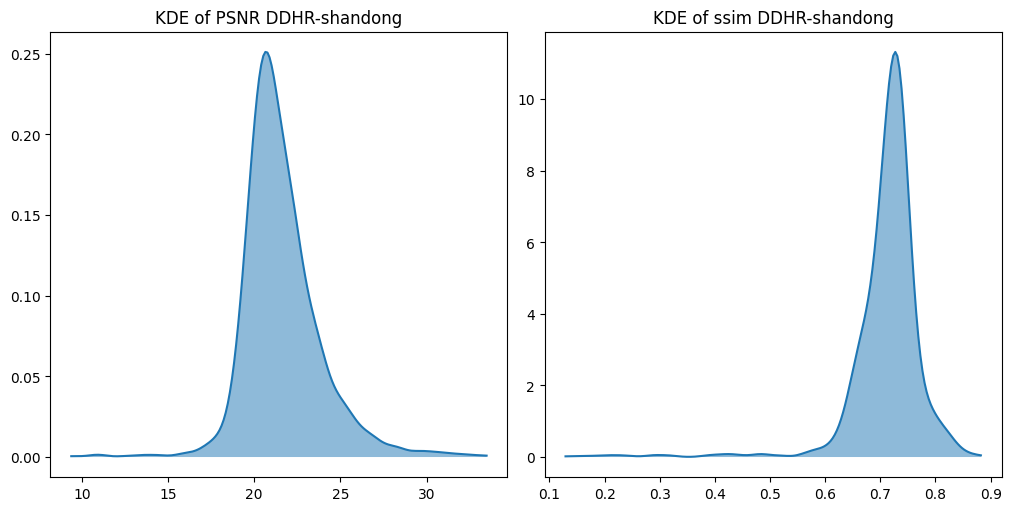

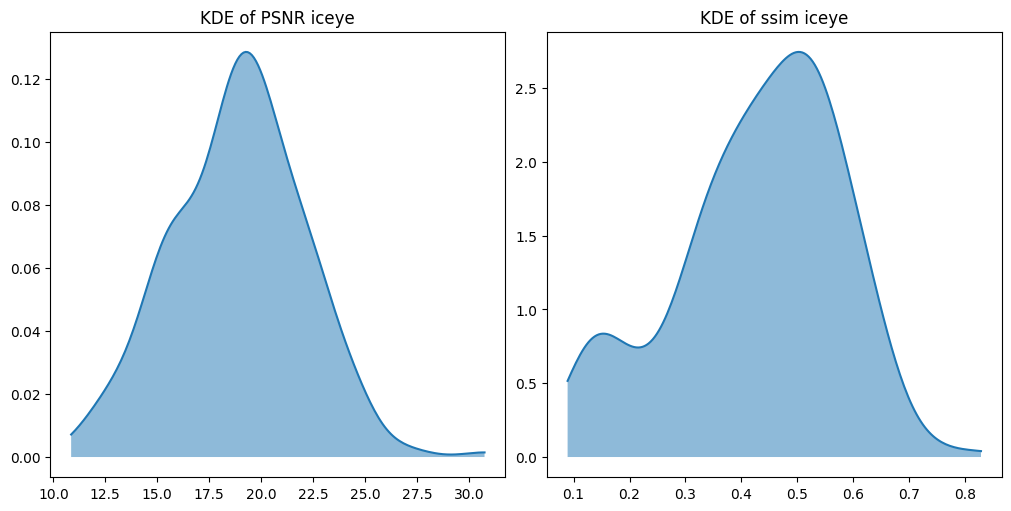

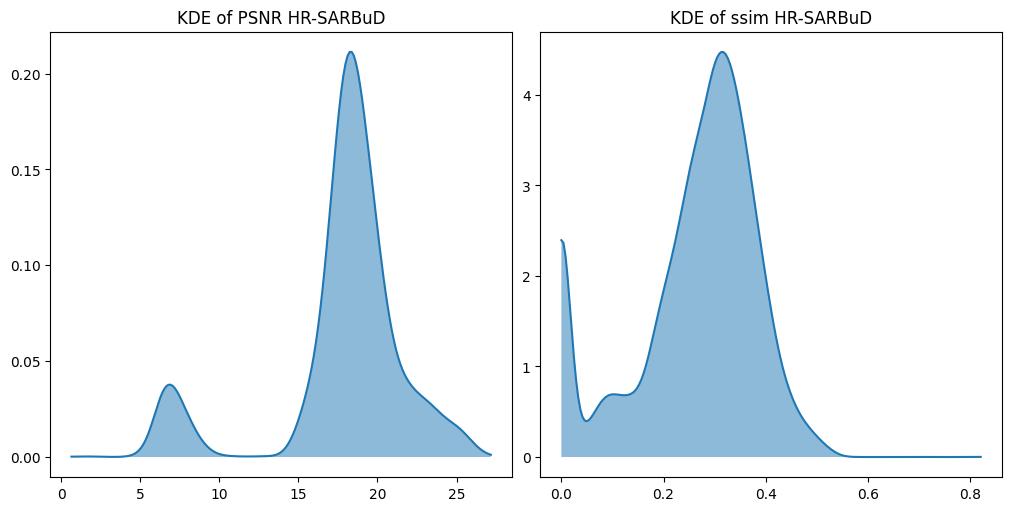

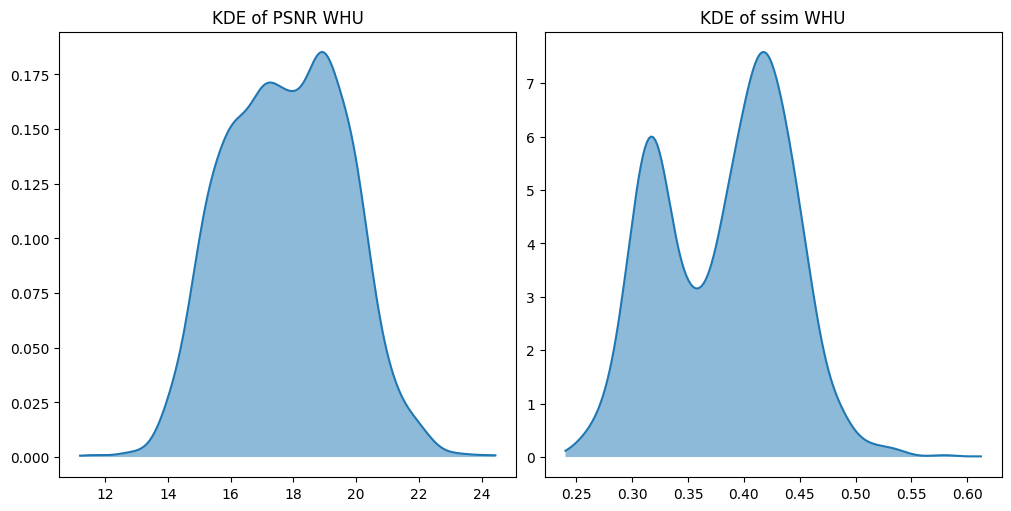

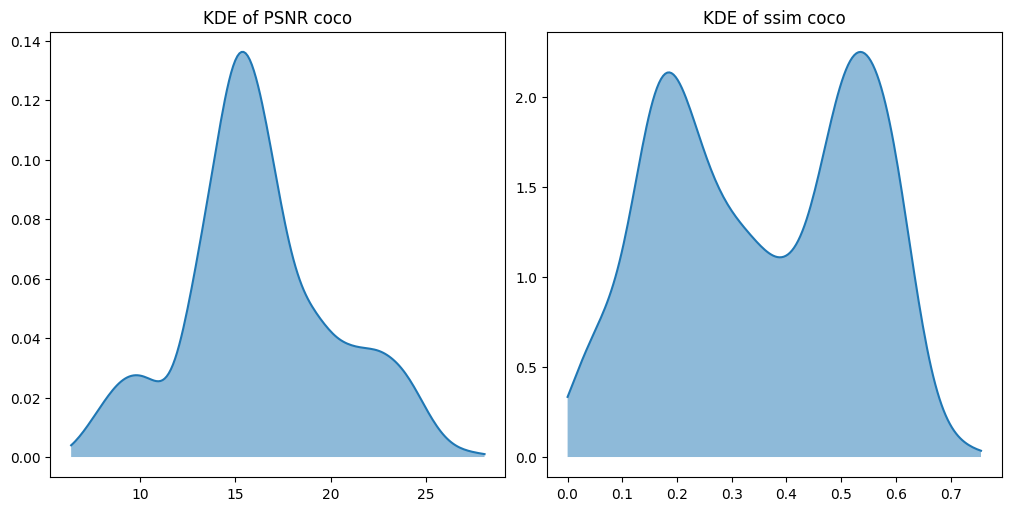

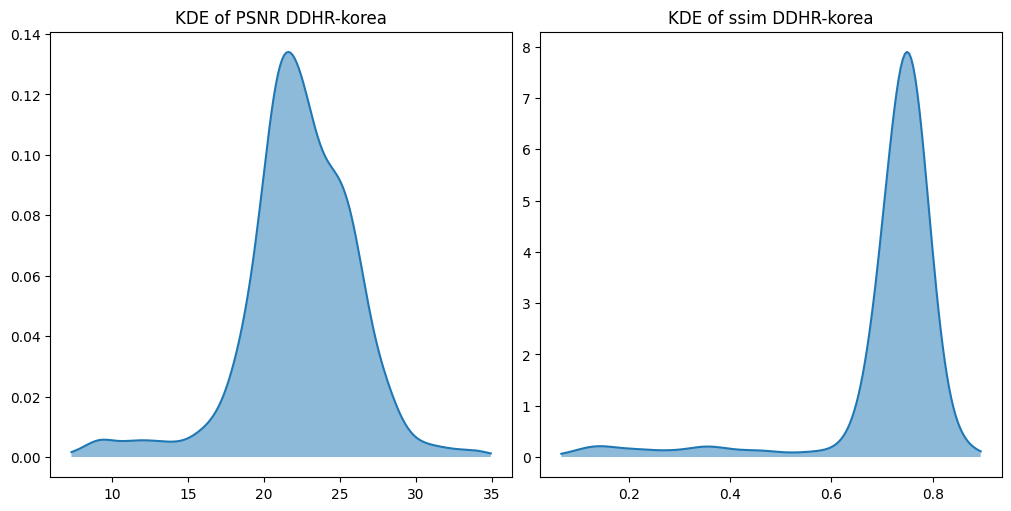

In [32]:
for ds in datasets:
    path=os.path.join("eval_kl_256",ds,"W_KLP_SO_256/last/DDPM_200_WaveletSRDataset.csv")
    psnr_ssim_kde(path,ds,save_dir="eval_kl_256/kde_figs")

In [34]:
res5=pd.read_csv("eval_256_klp_new.csv")
res5.sort_values(by="ssim")

,exp_name,ckpt_name,dataset,gt_path,mode,ddim_steps,eta,ddpm_steps,psnr,psnr_max,...,ssim,ssim_max,ssim_min,ssim_ci_lower,ssim_ci_upper,enl,epi,fid,lpips,data_path
0,W_KLP_SO_256,last.ckpt,WaveletSRDataset,/home/flyingbucket/DataStore/HR-SARBuD/images_...,DDPM,NaN,NaN,200,17.855622,27.167727,...,0.261267,0.820830,-0.000112,0.259466,0.263047,33.603965,4.998347e+10,112.200478,0.595016,logs/2025-08-15T22-56-24_W_KLP_SO_256/metrics_...
4,W_KLP_SO_256,last.ckpt,WaveletSRDataset,/home/flyingbucket/DataStore/NKU_coco/train_25...,DDPM,NaN,NaN,200,16.290593,28.085423,...,0.354993,0.755528,0.000100,0.348661,0.361558,96.688292,3.447023e+08,133.200794,0.604276,logs/2025-08-15T22-56-24_W_KLP_SO_256/metrics_...
5,W_KLP_SO_256,last.ckpt,WaveletSRDataset,/home/flyingbucket/DataStore/WHU/WHU_256_test,DDPM,NaN,NaN,200,17.780324,24.430694,...,0.382859,0.612237,0.240250,0.380821,0.384873,2.305446,2.628862e-01,272.855198,0.543229,logs/2025-08-15T22-56-24_W_KLP_SO_256/metrics_...
1,W_KLP_SO_256,last.ckpt,WaveletSRDataset,/home/flyingbucket/DataStore/iceye/train_256_test,DDPM,NaN,NaN,200,18.904307,30.757989,...,0.430311,0.828195,0.089263,0.412444,0.447562,19.463433,3.350897e-01,188.236120,0.509688,logs/2025-08-15T22-56-24_W_KLP_SO_256/metrics_...
3,W_KLP_SO_256,last.ckpt,WaveletSRDataset,/home/flyingbucket/DataStore/DDHRNet_DATA/kore...,DDPM,NaN,NaN,200,22.366351,34.920328,...,0.711463,0.894702,0.067160,0.704133,0.718626,3.577890,5.341646e-01,61.685398,0.260568,logs/2025-08-15T22-56-24_W_KLP_SO_256/metrics_...
2,W_KLP_SO_256,last.ckpt,WaveletSRDataset,/home/flyingbucket/DataStore/DDHRNet_DATA/shan...,DDPM,NaN,NaN,200,21.609811,33.486150,...,0.712467,0.882340,0.129101,0.709175,0.715658,3.516946,4.964335e-01,52.259790,0.241819,logs/2025-08-15T22-56-24_W_KLP_SO_256/metrics_...


In [9]:
best_dataset=res5[res5['psnr']==res5['psnr'].max()]['gt_path'].iloc[0]
len(os.listdir(best_dataset))

1234

In [10]:
koera=pd.read_csv("eval_kl_256/ds1/W_KLP_SO_256/last/DDPM_200_WaveletSRDataset.csv")
koera.columns

Index(['img', 'mode', 'psnr', 'ssim', 'lpips', 'enl', 'epi'], dtype='object')

In [11]:
best_img_name=koera[koera['psnr']==koera['psnr'].max()]['img'].iloc[0]
best_img_name

'1374.jpg'

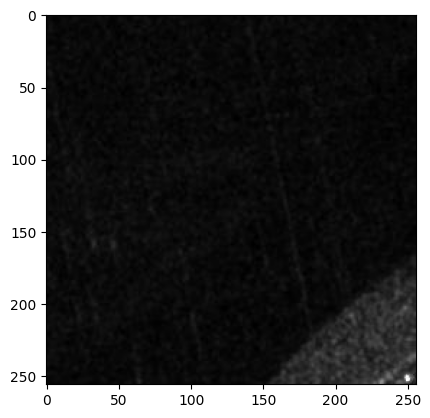

In [16]:
import cv2
import matplotlib.pyplot as plt
best_img=cv2.imread(os.path.join(best_dataset,best_img_name))
plt.imshow(best_img)

In [5]:
path=os.path.join("eval_kl_256",ds,"W_KLP_SO_256/last/DDPM_200_WaveletSRDataset.csv")    
path

'eval_kl_256/ds1/W_KLP_SO_256/last/DDPM_200_WaveletSRDataset.csv'